In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

start = timeit.default_timer()

data = pd.read_csv('data/highz_train.csv')
print(data)
N = len(data)

               objid  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0       1.240000e+18    22.70128    21.55564    20.74338    19.97239   
1       1.240000e+18    23.23910    21.44343    19.67306    18.94400   
2       1.240000e+18    24.05348    21.24721    19.39289    18.68024   
3       1.240000e+18    26.32478    20.74059    18.99681    18.29084   
4       1.240000e+18    24.76801    19.32076    17.81846    17.23835   
...              ...         ...         ...         ...         ...   
604930  1.240000e+18    23.95901    21.45168    20.99064    20.83455   
604931  1.240000e+18    26.08886    22.08654    21.42736    21.39464   
604932  1.240000e+18    24.30561    23.59575    21.74487    20.60606   
604933  1.240000e+18    25.70489    22.18283    21.30940    20.22876   
604934  1.240000e+18    21.34051    20.64733    20.40584    20.45839   

        modelMag_z  fiberMag_u  fiberMag_g  fiberMag_r  fiberMag_i  ...  \
0         19.65203    23.26064    22.38317    21.52284    20

In [2]:
#Data Cleaning
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values =-9999, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

Imputer = SimpleImputer(missing_values =0, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

array([[1.2400000e+18, 2.2701280e+01, 2.1555640e+01, ..., 2.1137710e+01,
        2.0602890e+01, 6.7997430e-01],
       [1.2400000e+18, 2.3239100e+01, 2.1443430e+01, ..., 2.0232370e+01,
        1.9659590e+01, 4.1207080e-01],
       [1.2400000e+18, 2.4053480e+01, 2.1247210e+01, ..., 1.9938540e+01,
        1.9384555e+01, 4.1314010e-01],
       ...,
       [1.2400000e+18, 2.4305610e+01, 2.3595750e+01, ..., 2.1827315e+01,
        2.0866255e+01, 5.3500880e+00],
       [1.2400000e+18, 2.5704890e+01, 2.2182830e+01, ..., 2.1706100e+01,
        2.0624625e+01, 6.9647850e+00],
       [1.2400000e+18, 2.1340510e+01, 2.0647330e+01, ..., 2.0842215e+01,
        2.0830430e+01, 6.4224720e+00]])

Text(0, 0.5, 'Number of samples')

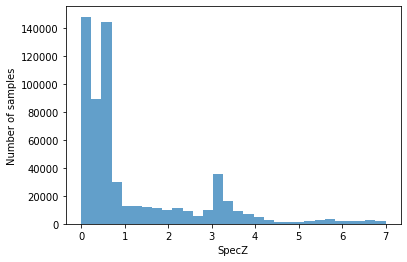

In [3]:
plt.hist(data['redshift'], bins=30, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [4]:
#Refered from base paper. Topic-->[Logarithmic Domain] Pg 4
c=1
data['redshift1']=c*np.log10(data.redshift+1)

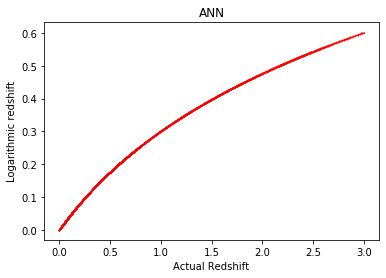

In [5]:
#plotting the graph of actual redshift vs logarithmic redshift
plt.scatter(data['redshift'].tolist()[:25000], data['redshift1'].tolist()[:25000], s=0.1, color="red")
plt.xlabel("Actual Redshift")
plt.ylabel("Logarithmic redshift")
plt.title("ANN")
plt.show()

In [6]:
#Refered from base paper. Page 5
#e = 2.71828
data['redshift2']=2.71828**(data['redshift1']-1)

In [7]:
#Check Page 3 and 4 from base paper
# Feature matrix

X=np.zeros((N,30))
X[: ,0] = data['modelMag_u']
X[: ,1] = data['modelMag_g']
X[: ,2] = data['modelMag_r']
X[: ,3] = data['modelMag_i']
X[: ,4] = data['modelMag_z']
X[: ,5] = data['modelMag_u'] - data['modelMag_g']
X[: ,6] = data['modelMag_g'] - data['modelMag_r']
X[: ,7] = data['modelMag_r'] - data['modelMag_i']
X[: ,8] = data['modelMag_i'] - data['modelMag_z']
X[: ,9] = data['fiberMag_u']
X[: ,10] = data['fiberMag_g']
X[: ,11] = data['fiberMag_r']
X[: ,12] = data['fiberMag_i']
X[: ,13] = data['fiberMag_z']
X[: ,14] = data['fiberMag_u'] - data['fiberMag_g']
X[: ,15] = data['fiberMag_g'] - data['fiberMag_r']
X[: ,16] = data['fiberMag_r'] - data['fiberMag_i']
X[: ,17] = data['fiberMag_i'] - data['fiberMag_z']
X[: ,18] = data['petroR50_r'] / data['petroR90_r']
X[: ,19] = data['petroR50_z'] / data['petroR90_z']
X[: ,20] = data['r'] - data['i']
X[: ,21] = data['i'] - data['z']
X[: ,22] = data['mmug']
X[: ,23] = data['mmgr']
X[: ,24] = data['mmri']
X[: ,25] = data['mmiz']
X[: ,26] = data['mfug']
X[: ,27] = data['mfgr']
X[: ,28] = data['mfri']
X[: ,29] = data['mfiz']
# Target vector
y = data['redshift2']

print(X)

[[22.70128  21.55564  20.74338  ... 21.953005 21.13771  20.60289 ]
 [23.2391   21.44343  19.67306  ... 21.472625 20.23237  19.65959 ]
 [24.05348  21.24721  19.39289  ... 21.21817  19.93854  19.384555]
 ...
 [24.30561  23.59575  21.74487  ... 23.248225 21.827315 20.866255]
 [25.70489  22.18283  21.3094   ... 22.73945  21.7061   20.624625]
 [21.34051  20.64733  20.40584  ... 20.96003  20.842215 20.83043 ]]


In [8]:
train_no=int((3*N)/4)
X_train=X[:train_no,:]
y_train=y[:train_no]
X_test=X[train_no:,:]
y_test=y[train_no:]
print('Training data has %d samples'%(train_no))
print('Test data has %d samples'%(N-train_no))
print(y_train)

Training data has 453701 samples
Test data has 151234 samples
0         0.460843
1         0.427354
2         0.427494
3         0.425657
4         0.405855
            ...   
453696    0.427134
453697    0.385711
453698    0.397791
453699    0.377270
453700    0.377394
Name: redshift2, Length: 453701, dtype: float64


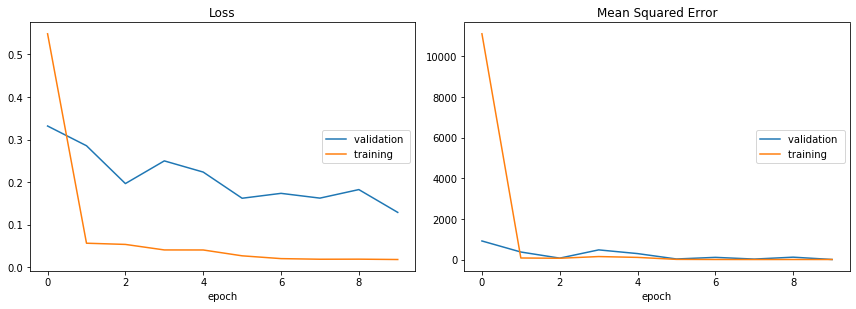

Loss
	validation       	 (min:    0.129, max:    0.332, cur:    0.129)
	training         	 (min:    0.018, max:    0.549, cur:    0.018)
Mean Squared Error
	validation       	 (min:    1.199, max:  912.509, cur:    1.199)
	training         	 (min:    0.211, max: 11107.624, cur:    0.641)


In [9]:
#Building the neural network
#importing the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot import PlotLossesKeras


model = Sequential()

# The Input Layer :
model.add(Dense(output_dim = 960, kernel_initializer='normal',input_dim = 30, activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#adding the Dropout
model.add(Dropout(0.1))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

#fitting the model
history = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()], verbose=1)

In [10]:
#predicting the test set
y_pred = model.predict(X_test)
print("The predicted z values are",y_pred)

stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

The predicted z values are [[0.3848256 ]
 [0.41997793]
 [0.4064333 ]
 ...
 [0.45174852]
 [0.46179333]
 [0.6478647 ]]
Time:  7.975101824999999 minutes


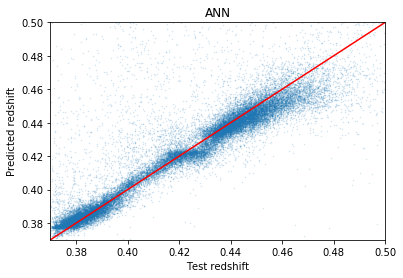

In [11]:
#Plotting the Results-Graph-1
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("ANN")
ax1.scatter(y_test, y_pred, alpha=0.2, s=0.2)
ax1.set_xlabel("Test redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,.5], [0,.5], '-r')
ax1.set_xlim(0.37, .5)
ax1.set_ylim(0.37, .5)
plt.show()

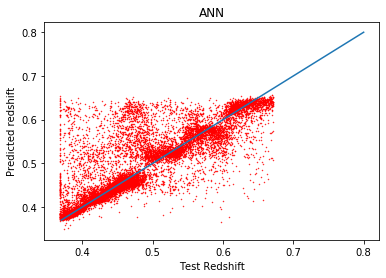

In [12]:
#plotting the results-Graph-2
plt.scatter(y_test.tolist()[:25000], y_pred.tolist()[:25000], s=0.2, color="red")
plt.plot([0.37, 0.8], [0.37, 0.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("ANN")
plt.show()

In [13]:
#Evaluating the model
from sklearn import metrics
from math import sqrt

var = metrics.explained_variance_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rms = sqrt(metrics.mean_squared_error(y_test, y_pred))
bias = (1/N)*sum(((np.subtract(y_pred.tolist()[:25000],y_test.tolist()[:25000]))/(np.subtract(1,y_test.tolist()[:25000]))), N-train_no)

print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('RMS Score :', rms)
print('Model Bias Score:', bias.mean())

Explained variance (best possible score is 1.0, lower values are worse): -55.41891943589793
Mean Absolute Error (best is 0.0): 0.12868901500140129
Mean Squared Error (best is 0.0): 1.1988894895945916
R2 score (best is 1.0): -56.12228373495238
RMS Score : 1.0949381213541667
Model Bias Score: 0.24954708272321582
